# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала.

<!--
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import librosa as lr
import IPython.display as ipd
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

.wav файл — аудиофайл. Состоит из заголовка, в котором указывается, что это файл wav,
его частота дискретизации, глубина квантования, кол-во каналов, а также из самих сырых данных

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

Samplerate = 22050


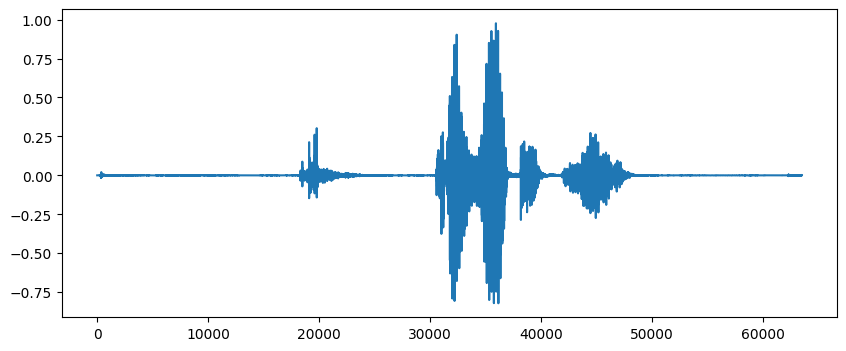

In [ ]:
# Изначальный samplerate
x, sr = lr.load("привет_мир.wav")
audio = ipd.Audio(x, rate=sr)
ipd.display(audio)
print("Samplerate =", sr)

plt.figure(figsize=(10, 4))
plt.plot(x)

На samplerate = 3000 все еще можно разобрать речь. Предполагаю, так как частота основного тона у мужчин в диапазоне примерно от 80 до 150 Гц, F1 от 200 до 800, а F2 от 800 до 2500, то для членораздельной речи без помех распознаванию достаточно частоты дискретизации, равной 5000 Гц (теорема Котельникова)

In [ ]:
# samplerate в два раза меньше
x, sr = lr.load("привет_мир.wav", sr=3000)
audio2 = ipd.Audio(x, rate=sr)
ipd.display(audio2)
print("Samplerate =", sr)

Samplerate = 3000


Действительно, на 5000Гц нет никаких затруднений распознаванию. Меньшая ЧД все равно может быть опознаваема за счет компенсаторики по более низким формантам

In [ ]:
# samplerate 5000
x, sr = lr.load("привет_мир.wav", sr=5000)
audio2 = ipd.Audio(x, rate=sr)
ipd.display(audio2)
print("Samplerate =", sr)

Samplerate = 5000


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

.wav — формат сжатого и несжатого аудио (чаще всего несжатого, а если сжатого, то без потерь).

.ogg и .mp3 — формат сжатия с потерями. .ogg считается более современным (из-за лучшего кодека Vorbis), но в основе двух форматов (.mp3 и .ogg) лежит похожая идея: адаптировать сжатие под психоакустическую модель восприятия звука человеком (то есть, сохранить те частоты, которые человек слышит лучше, а пожертвовать теми, которые он слышит хуже).

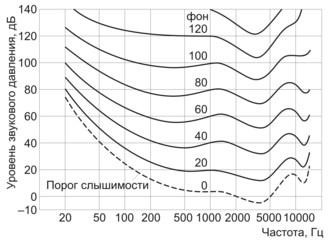

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону.

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время.


In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10,
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k',
        linewidth = 1)
    plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
    plt.show()

In [ ]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

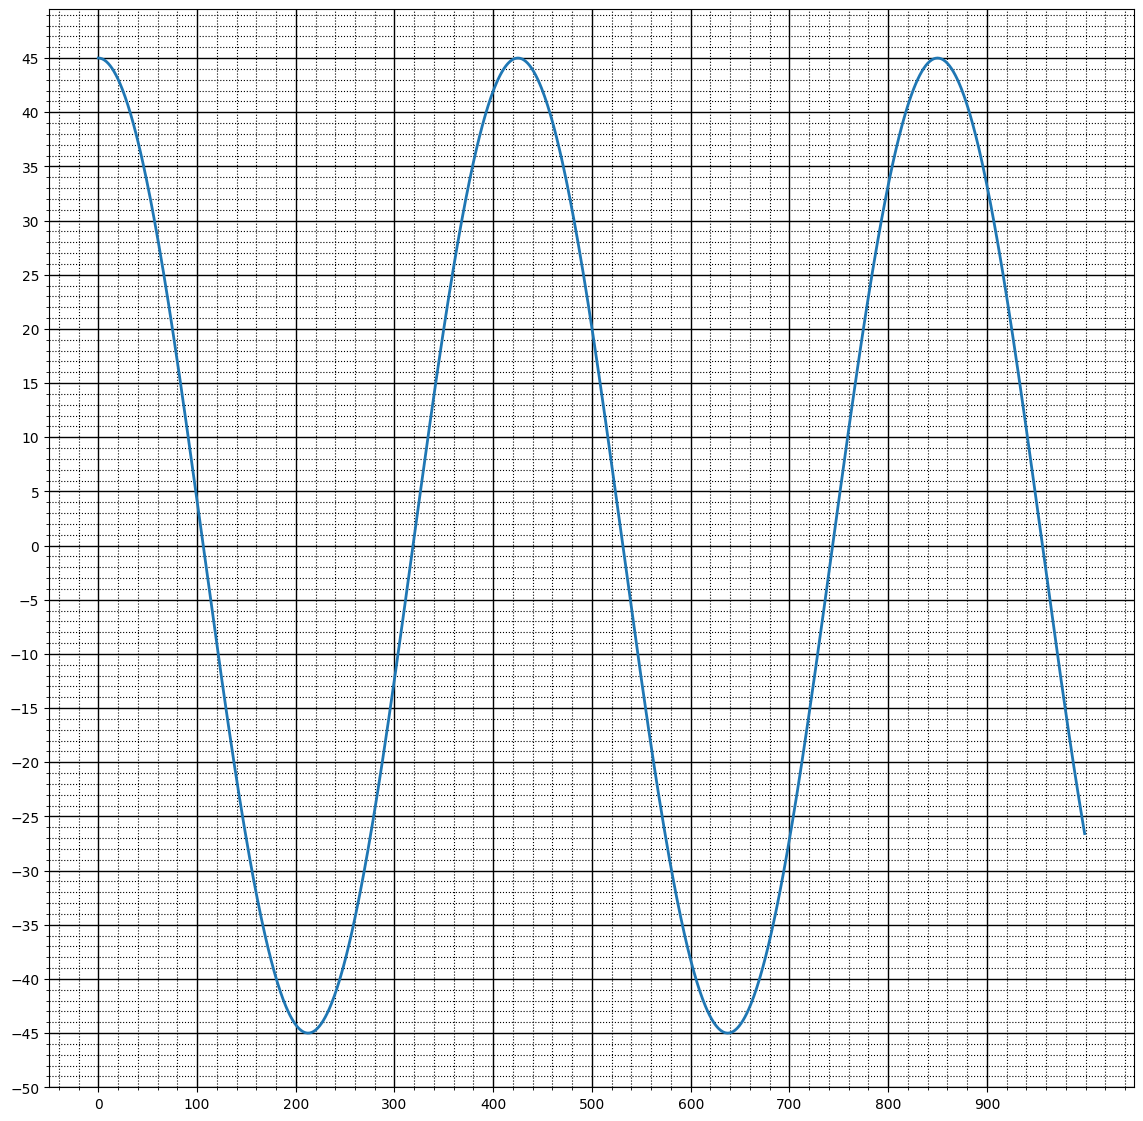

In [ ]:
draw_signal(test_data['task2']['a'])

In [ ]:
# формула гармонического колебания
def harmonic_oscillation(t, A, T, phi0):
  omega = 2 * np.pi / T
  print(f'Omega = {omega}')
  return A * np.cos(omega * t + phi0)

In [ ]:
counts = np.arange(0, 1000)
a = harmonic_oscillation(counts, 45, 425, 0)

Omega = 0.01478396542865785


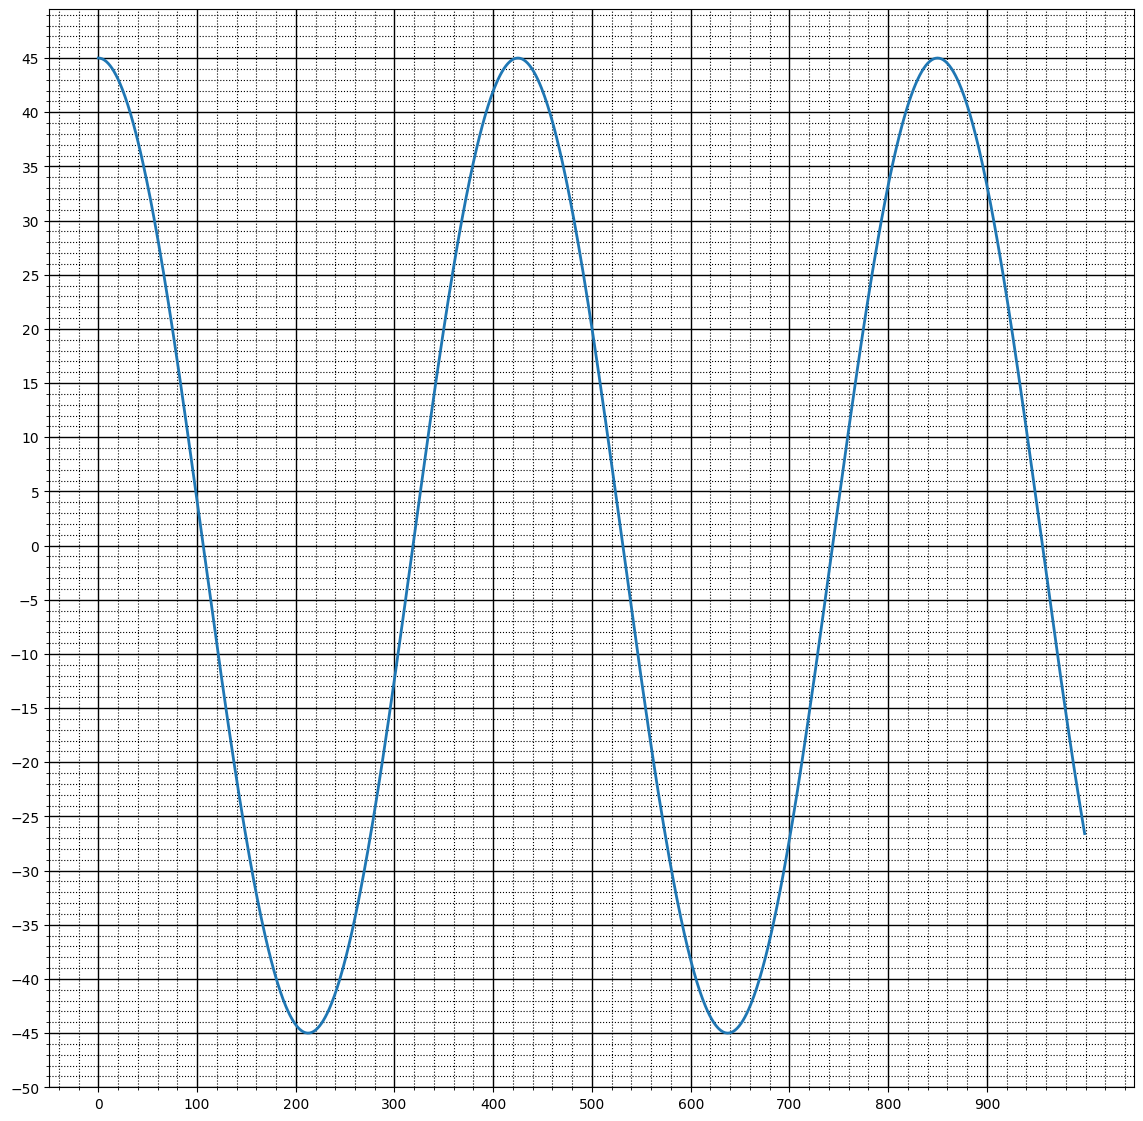

In [ ]:
draw_signal(a)

In [ ]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $ 45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $ 0.01478396542865785

3. Фаза - $\phi= $ 0

### Сигнал ***b***

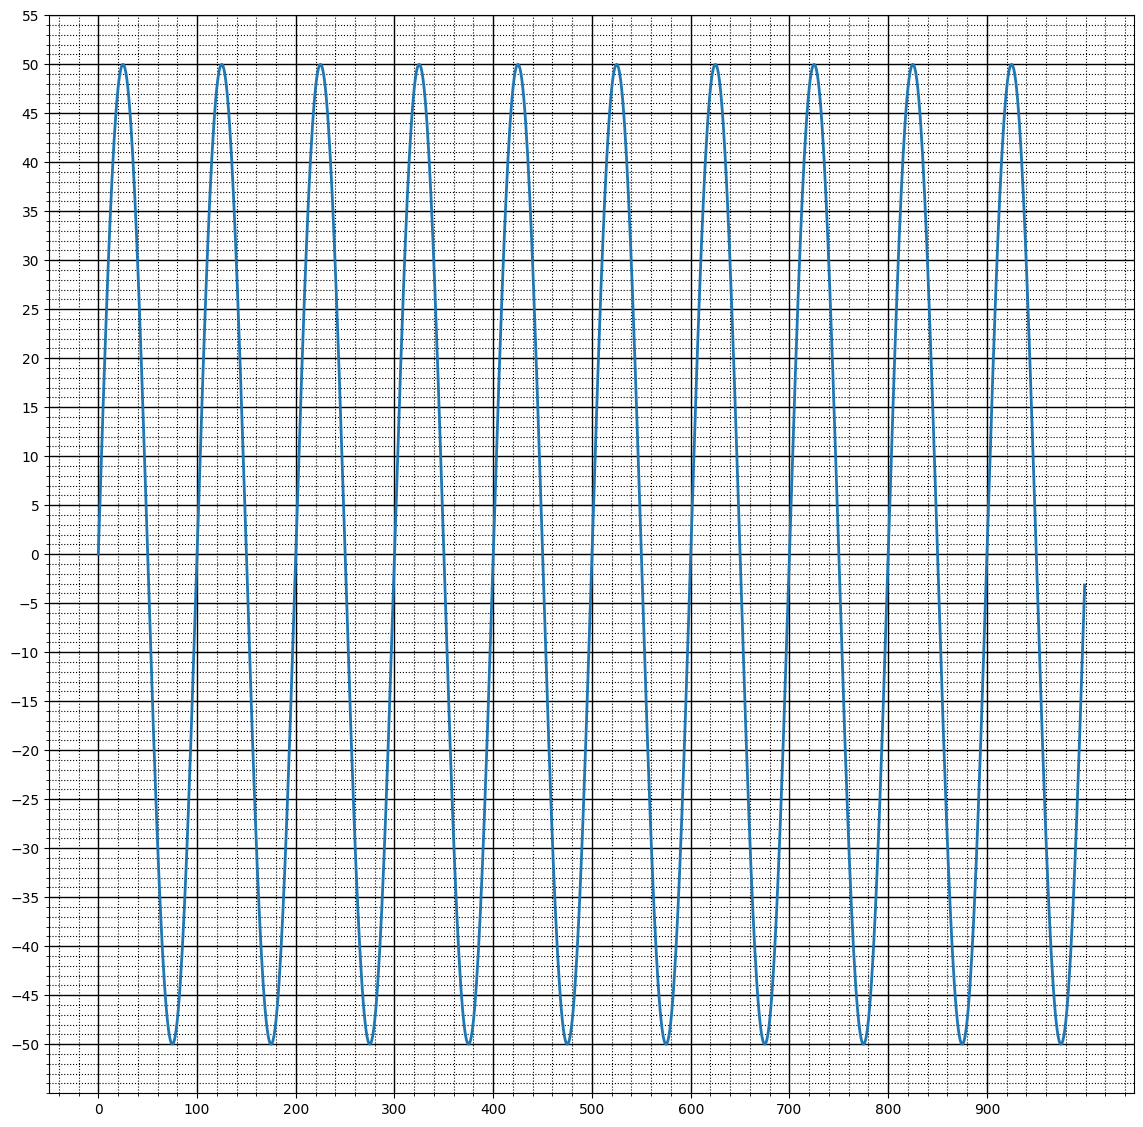

In [ ]:
draw_signal(test_data['task2']['b'])

In [ ]:
counts = np.arange(0, 1000)
b = harmonic_oscillation(counts, 50, 100, 11)

Omega = 0.06283185307179587


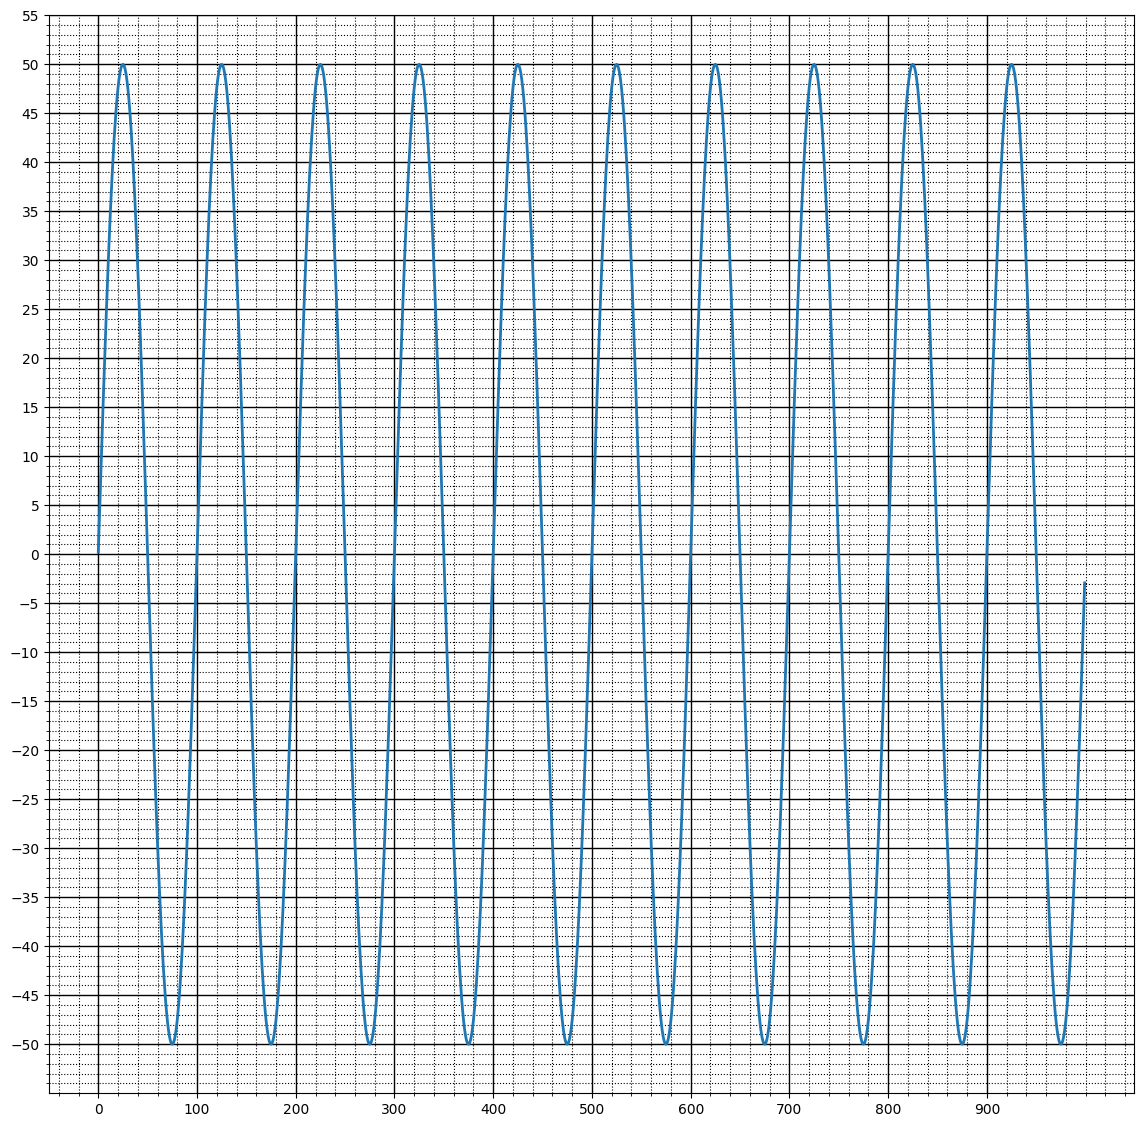

In [ ]:
draw_signal(b)

In [ ]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $ 50

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $ 0.06283185307179587

3. Фаза - $\phi= $ 11

### Сигнал ***c***

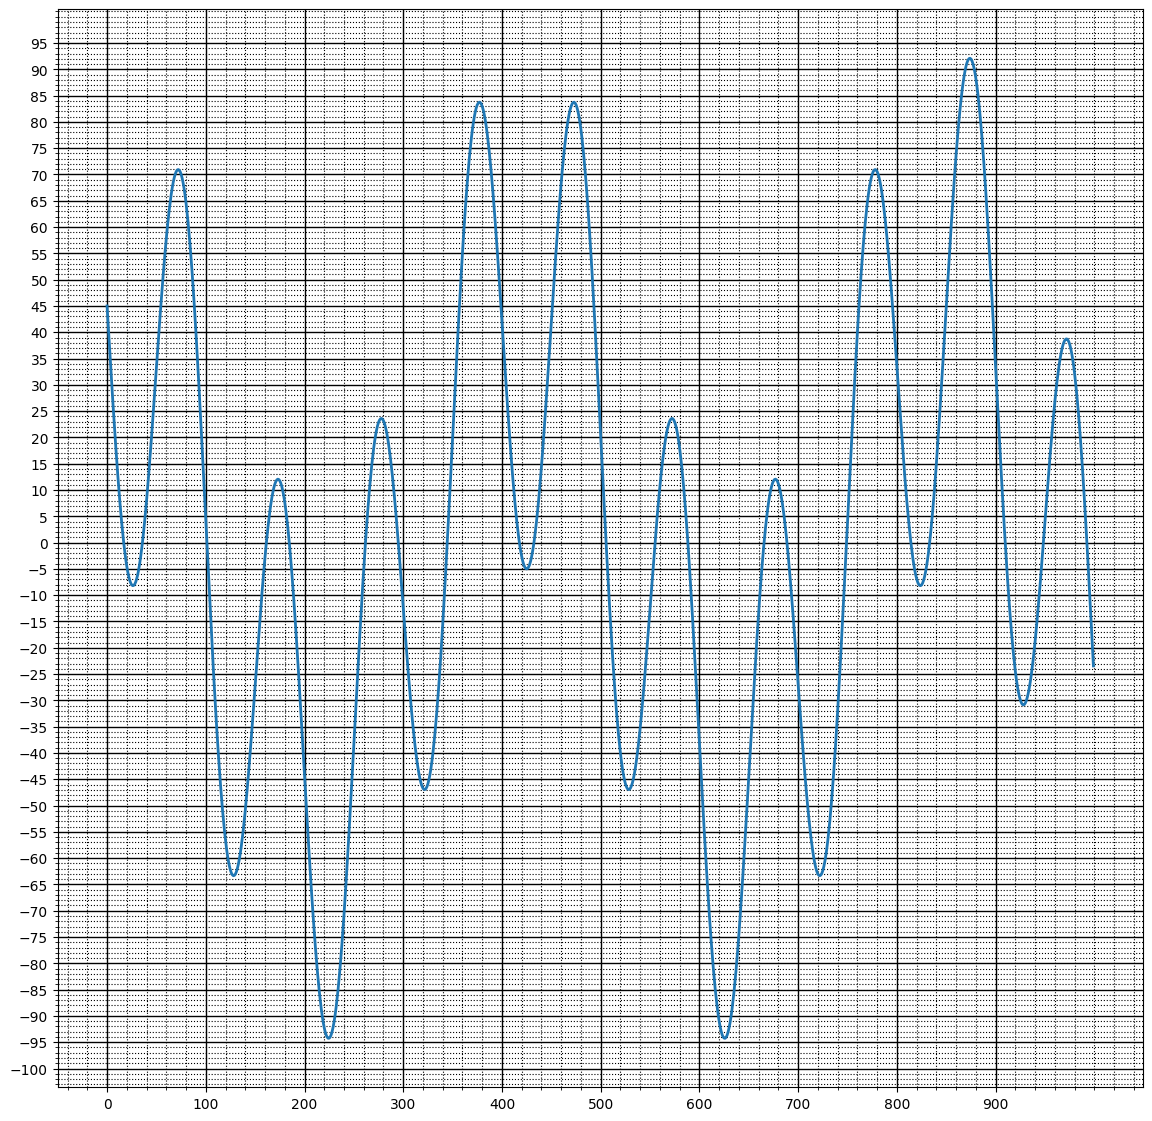

In [ ]:
draw_signal(test_data['task2']['c'])

In [ ]:
counts = np.arange(0, 1000)

c = harmonic_oscillation(counts, 51, 400, 35) + harmonic_oscillation(counts, 51, 100, 5)

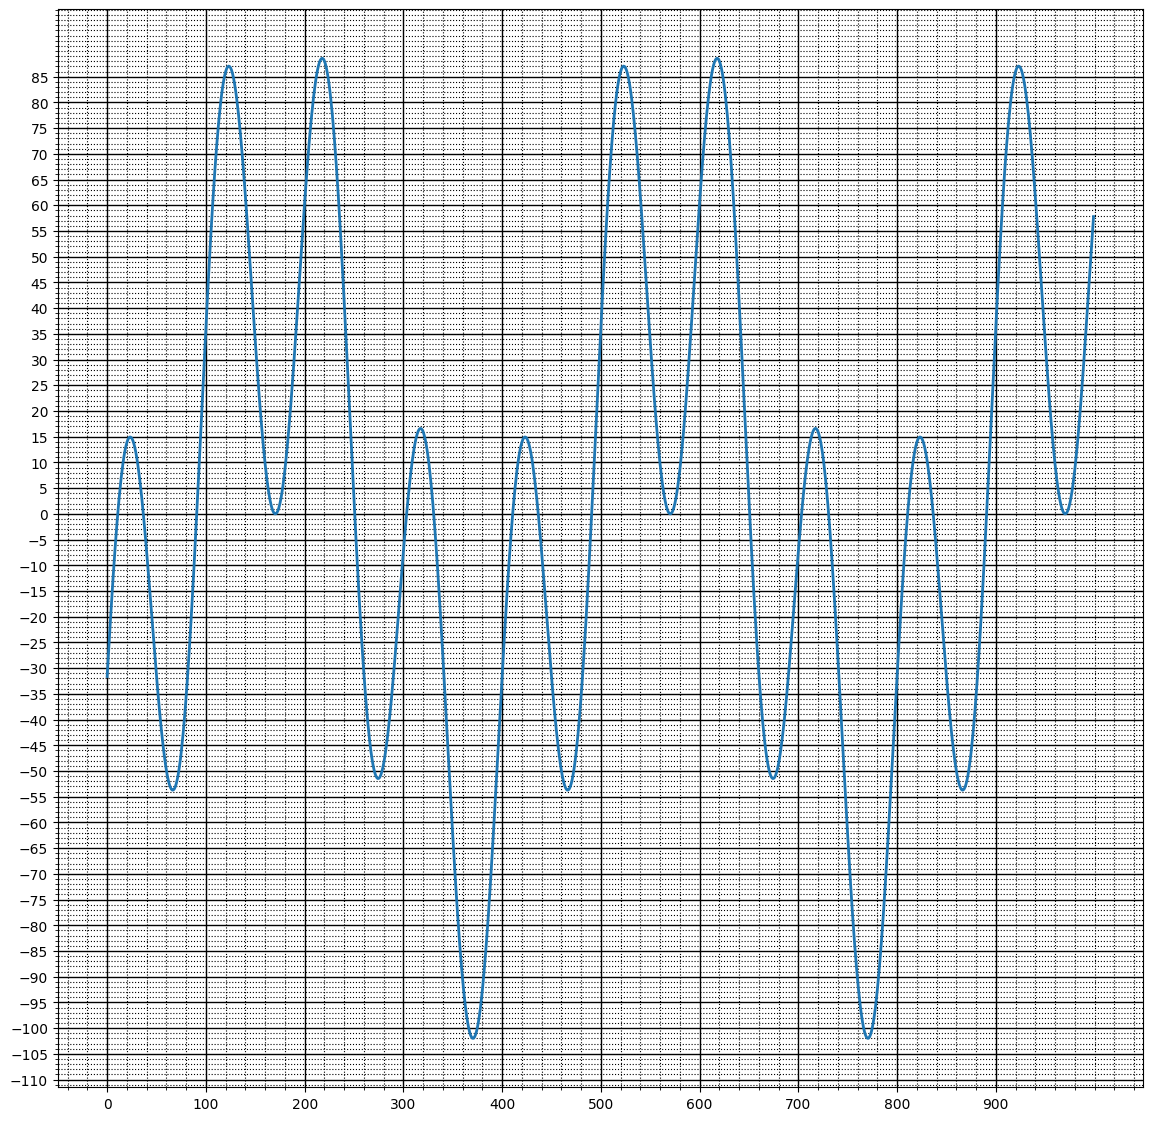

In [ ]:
draw_signal(c)

In [ ]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

AssertionError: 

# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [ ]:
def convolve(in1, in2):
  in1 = list(in1)
  in2 = list(in2)
  len1 = len(in1)
  len2 = len(in2)
  result_length = len1 + len2 - 1
  result = [0.0] * result_length

  for n in range(result_length):
      total = 0.0
      for m in range(max(0, n - len2 + 1), min(len1, n + 1)):
          if 0 <= n - m < len2:
              total += in1[m] * in2[n - m]
      result[n] = total

  return result

In [ ]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [ ]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [ ]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

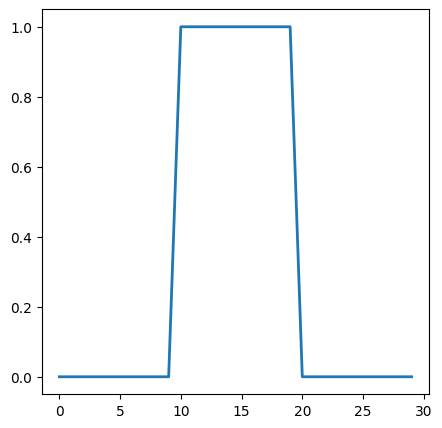

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(a, linewidth=2)

Сигнал **b**

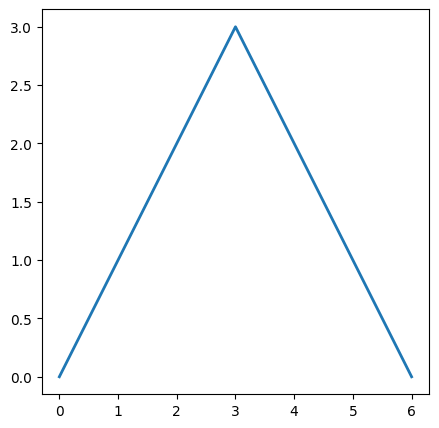

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(b, linewidth=2)

Свертка **a** и **b**

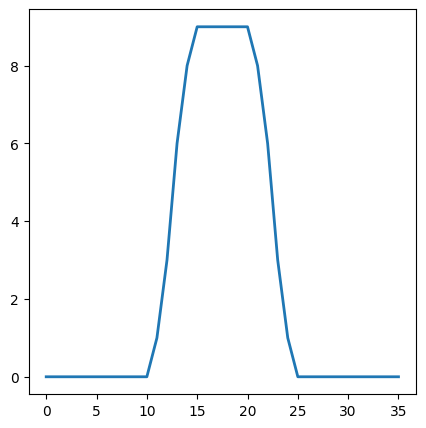

In [ ]:
convolved = convolve(a, b)
plt.figure(figsize=(5, 5))
plt.plot(convolved, linewidth=2)

Все 3 графика на одной картинке:

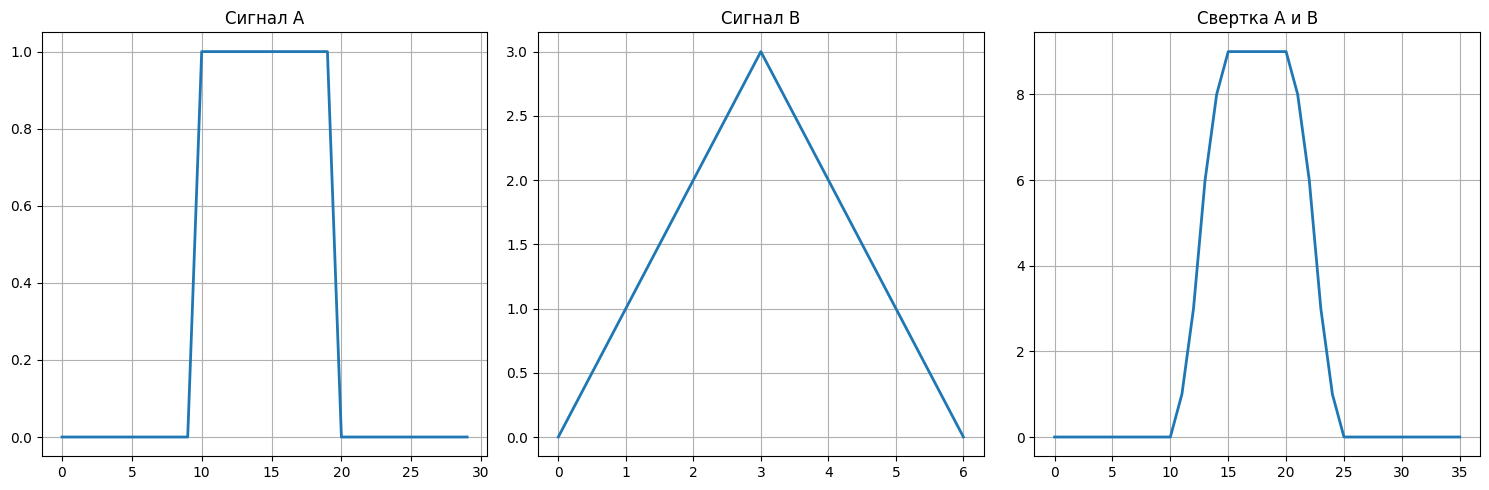

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(a, linewidth=2)
axes[0].set_title('Сигнал A')
axes[0].grid(True)
axes[1].plot(b, linewidth=2)
axes[1].set_title('Сигнал B')
axes[1].grid(True)
axes[2].plot(convolved, linewidth=2)
axes[2].set_title('Свертка A и B')
axes[2].grid(True)
plt.tight_layout()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат.

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise
    # YOUR CODE HERE



    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
sec = 2NJ
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE